In [15]:
from PIL import Image
import torch
from pypylon import pylon
import numpy as np
import cv2
from ctypes import *
import glob
import matplotlib.pylab as pl
import matplotlib.pyplot as plt
%matplotlib inline

In [24]:
def find_class(results, obj = 'car'):
    len_of_class = len(results.pred)
    pred_class = [int(results.pred[0][i].numpy()[5]) for i in range(len(results.pred[0]))]
    #list_of_yolo_classes = list(zip(results.names, range(0, len(results.names))))
    pred_names = [results.names[i] for i in pred_class]
    if obj in pred_names:
        index = pred_names.index(obj)
        return results.pred[0][index].numpy()
    else:
        return np.array([])

In [3]:
model_yolo = torch.hub.load('ultralytics/yolov5', 'yolov5s', force_reload=True, pretrained=True)

Downloading: "https://github.com/ultralytics/yolov5/archive/master.zip" to C:\Users\CIG/.cache\torch\hub\master.zip

                 from  n    params  module                                  arguments                     
  0                -1  1      3520  models.common.Focus                     [3, 32, 3]                    
  1                -1  1     18560  models.common.Conv                      [32, 64, 3, 2]                
  2                -1  1     18816  models.common.C3                        [64, 64, 1]                   
  3                -1  1     73984  models.common.Conv                      [64, 128, 3, 2]               
  4                -1  1    156928  models.common.C3                        [128, 128, 3]                 
  5                -1  1    295424  models.common.Conv                      [128, 256, 3, 2]              
  6                -1  1    625152  models.common.C3                        [256, 256, 3]                 
  7                -1  1   

Adding autoShape... 


In [4]:
img_path = r'C:\Users\CIG\Documents\car_imgs'

In [6]:
#open folder with images
#and save all images in the array

images=glob.glob(r"C:\Users\CIG\Documents\car_imgs\*.jpg")
stack_of_imgs = []
for image in images:
    img = Image.open(image)
    stack_of_imgs.append(img)

In [10]:
# Define containers
average_gradient = []

for im in stack_of_imgs:
    # Calculate the gradient
    sobelx = cv2.Sobel(np.float32(im), cv2.CV_64F ,1 , 0, ksize=5)
    sobely = cv2.Sobel(np.float32(im),cv2.CV_64F,0,1,ksize=5)

    abs_sobel_x = cv2.convertScaleAbs(sobelx) # converting back to uint8
    abs_sobel_y = cv2.convertScaleAbs(sobely)
    #print(abs_sobel_x )

    # Combine the two gradients with equal weight
    dst = cv2.addWeighted(abs_sobel_x,0.5,abs_sobel_y,0.5,0)
    #print(dst)

    # Calculate the average gradient for the image
    # I convert it to a numpy array for ease of calculation
    average_gradient.append(pl.asarray(dst).mean())

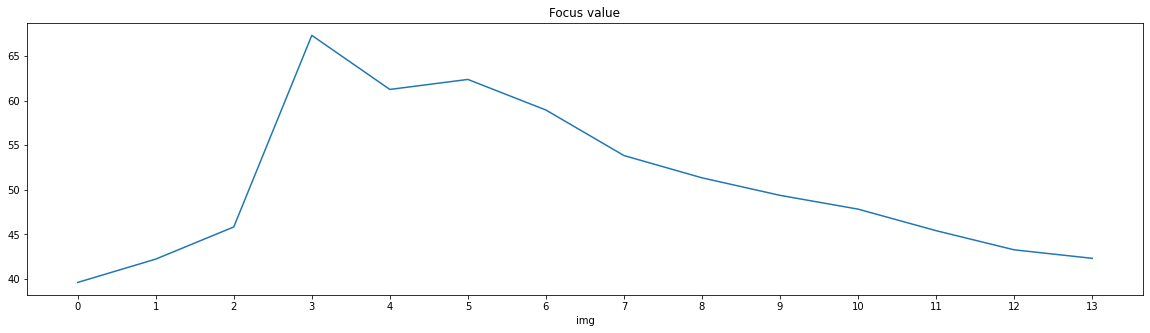

In [21]:
plt.figure(figsize=(20,5))
plt.plot(average_gradient)
plt.xticks(range(0,14))
plt.title("Focus value")
plt.xlabel('img')
#plt.savefig('gradient.png')
plt.show()

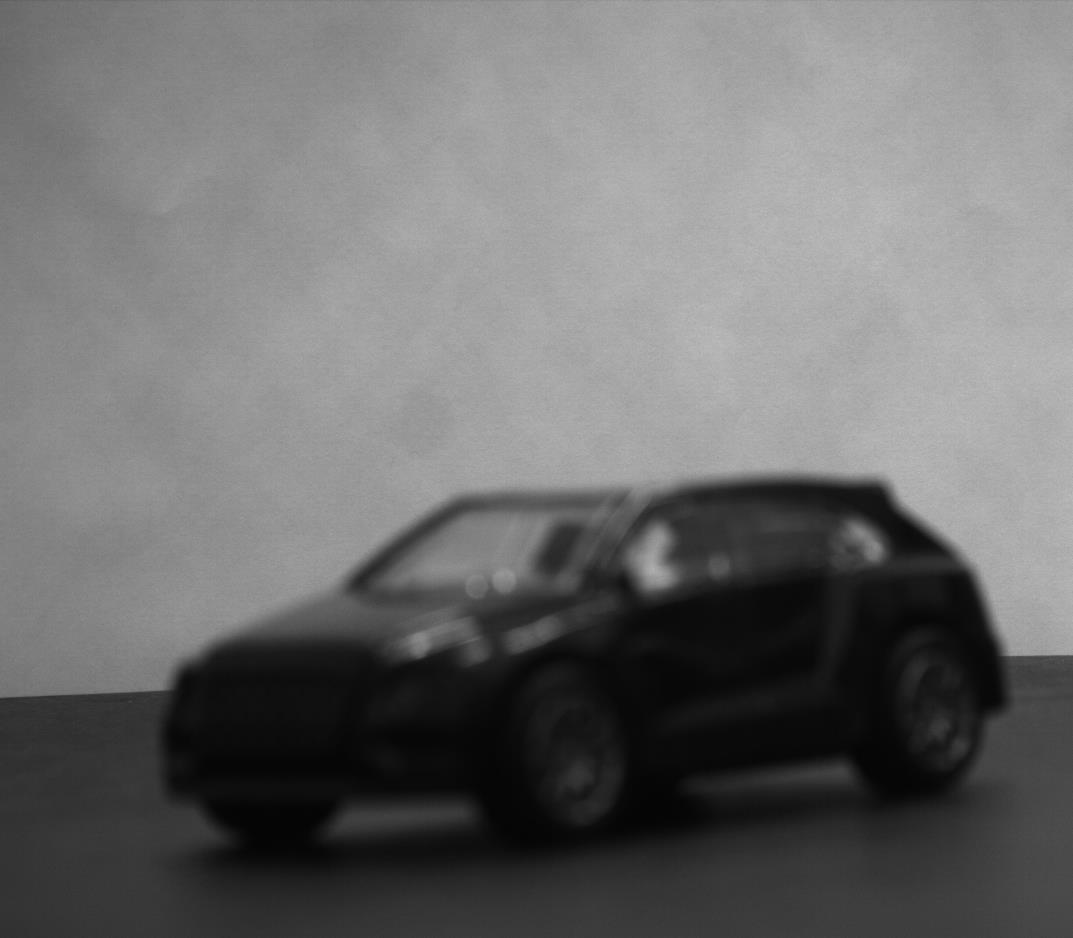

In [22]:
stack_of_imgs[3]

In [26]:
imgs_stack_yolo = []
for im in stack_of_imgs:
    results = model_yolo(im, size=640)  
    results.print()  # print results to screen
    results.show()  # display results
    r = find_class(results, obj = 'car')
    if r.size == 0:
        imgs_stack_yolo.append(0)
    else:
        imgs_stack_yolo.append(im.crop((r[0], r[1], r[2], r[3])))

image 1/1: 938x1073
image 1/1: 938x1073
image 1/1: 938x1073
image 1/1: 938x1073 1 car
image 1/1: 938x1073 1 car
image 1/1: 938x1073 1 car
image 1/1: 938x1073 1 car
image 1/1: 938x1073 1 car
image 1/1: 938x1073
image 1/1: 938x1073
image 1/1: 938x1073
image 1/1: 938x1073
image 1/1: 938x1073
image 1/1: 938x1073


In [27]:
# Define containers
average_gradient = []

for im in imgs_stack_yolo:
    if im == 0:
        average_gradient.append(0)
    else:
        # Calculate the gradient
        sobelx = cv2.Sobel(np.float32(im), cv2.CV_64F ,1 , 0, ksize=5)
        sobely = cv2.Sobel(np.float32(im),cv2.CV_64F,0,1,ksize=5)

        abs_sobel_x = cv2.convertScaleAbs(sobelx) # converting back to uint8
        abs_sobel_y = cv2.convertScaleAbs(sobely)
        #print(abs_sobel_x )

        # Combine the two gradients with equal weight
        dst = cv2.addWeighted(abs_sobel_x,0.5,abs_sobel_y,0.5,0)
        #print(dst)

        # Calculate the average gradient for the image
        # I convert it to a numpy array for ease of calculation
        average_gradient.append(pl.asarray(dst).mean())

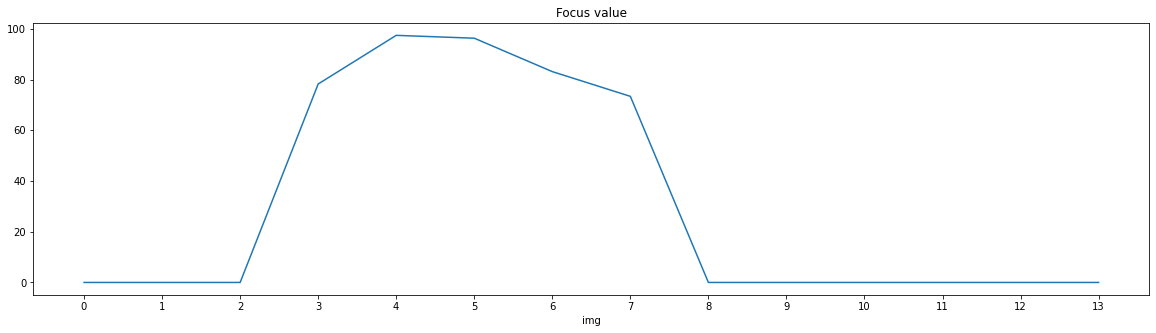

In [28]:
plt.figure(figsize=(20,5))
plt.plot(average_gradient)
plt.xticks(range(0,14))
plt.title("Focus value")
plt.xlabel('img')
#plt.savefig('gradient.png')
plt.show()

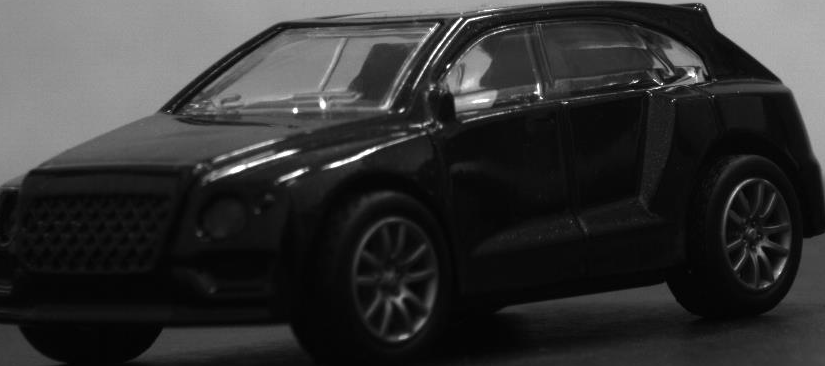

In [29]:
imgs_stack_yolo[4]

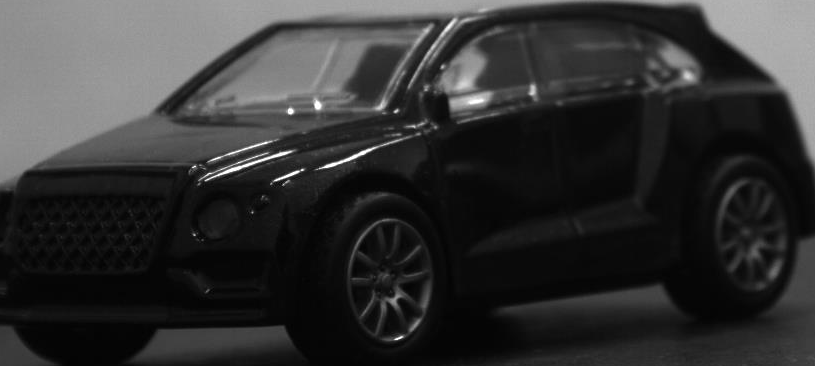

In [30]:
imgs_stack_yolo[5]